In [1]:
from tensorflow import keras

In [2]:
#import data
(train_images,train_labels),(test_images,test_labels) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [3]:
#scaling
train_images, test_images = train_images / 255, test_images / 255

In [4]:
from keras import layers, models, losses

In [5]:
#Create model
model = models.Sequential()

In [6]:
#Create CNN Layers
model.add(layers.Conv2D(32,(3,3),activation="relu",input_shape=(32,32,3)))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(64,(3,3),activation="relu"))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(64,(3,3),activation="relu"))

In [7]:
#Create Dense Layers
model.add(layers.Flatten())
model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dense(10))

In [9]:
#Compile Model
model.compile(optimizer="adam",
              loss=losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

In [10]:
from keras.preprocessing.image import ImageDataGenerator

In [11]:
# To increase our input data we use Image Augmentation
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [12]:
# Fit the train_images to datagen
datagen.fit(train_images)

In [13]:
#Fit the model with datagen
model.fit(datagen.flow(train_images, train_labels), 
          batch_size= 32, steps_per_epoch=len(train_images)/32,
          epochs=25, verbose=1)

Epoch 1/25
1562/1562 [==============================] - 86s 55ms/step - loss: 1.8154 - accuracy: 0.1066
Epoch 2/25
1562/1562 [==============================] - 85s 54ms/step - loss: 1.5755 - accuracy: 0.0947
Epoch 3/25
1562/1562 [==============================] - 84s 54ms/step - loss: 1.4726 - accuracy: 0.0943
Epoch 4/25
1562/1562 [==============================] - 85s 54ms/step - loss: 1.4007 - accuracy: 0.0940
Epoch 5/25
1562/1562 [==============================] - 85s 54ms/step - loss: 1.3613 - accuracy: 0.0960
Epoch 6/25
1562/1562 [==============================] - 84s 54ms/step - loss: 1.3183 - accuracy: 0.0980
Epoch 7/25
1562/1562 [==============================] - 84s 54ms/step - loss: 1.2826 - accuracy: 0.0971
Epoch 8/25
1562/1562 [==============================] - 84s 54ms/step - loss: 1.2559 - accuracy: 0.0986
Epoch 9/25
1562/1562 [==============================] - 84s 54ms/step - loss: 1.2355 - accuracy: 0.0987
Epoch 10/25
1562/1562 [==============================] - 84s 54m

In [14]:
#evaluate the model and get loss with accuracy metric
loss = model.evaluate(datagen.flow(test_images, test_labels),batch_size=32)

313/313 [==============================] - 9s 27ms/step - loss: 1.0676 - accuracy: 0.1148


In [15]:
prediction = model.predict(test_images)

In [16]:
import matplotlib.pyplot as plt
import numpy as np

In [17]:
class_names=["airplane","automobile","bird","cat",
             "deer","dog","frog","horse","ship","truck"]

Lütfen tahmin gerçekleştirmek istediğiniz indeksi girin: 7
Real Value: frog - Predicted Value: frog


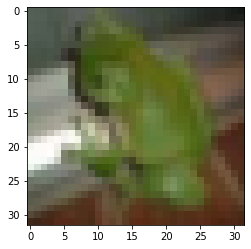

In [18]:
INDEX=""
while INDEX.isdigit() == False:
  INDEX = input("Lütfen tahmin gerçekleştirmek istediğiniz indeksi girin: ")
  if int(INDEX)>=len(test_images):
    INDEX=""

INDEX = int(INDEX)

predicted_value=class_names[np.argmax(prediction[INDEX])]
actual_value= class_names[test_labels[INDEX][0]]

print(f"Real Value: {actual_value} - Predicted Value: {predicted_value}")
plt.figure()
plt.imshow(test_images[INDEX])